# Imitation learning

In this brief tutorial we show how to reproduce the Figures 6 and 7c of the Appendix of [our paper](soon). The goal is to show that projective simulation (PS) can imitate the policy of agent moving following a certain step length distribution. We focus on two distributions: Lévy and Bi-exponential.

First, let's load the needed libraries and functions. See that `rl_opts` needs to be already installed (see instructions in the README file).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from rl_opts.imitation import PS_imitation
from rl_opts.analytics import pdf_powerlaw, pdf_multimode, pdf_discrete_sample, get_policy

## Lévy distributions
We consider distribution of the type $P(L)=L^{-1-\beta}$, with various $\beta$:

In [ ]:
NUM_STATES = 100 # size of the state space
EPOCHS = 100 # number of epochs
NUM_STEPS = 1000 # number of learning steps per episode

steps = pdf_discrete_sample(pdf_func = pdf_powerlaw,
                            beta = 1,
                            L_max = NUM_STATES,  
                            num_samples = (EPOCHS, NUM_STEPS))

imitator = PS_imitation(num_states = NUM_STATES,
                        eta = int(1e-7),
                        gamma = 0)
    
                               
for e in tqdm(range(EPOCHS)):
    imitator.reset()
    for s in steps[e]:    
        imitator.update(length = s)


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
NUM_STATES = 100 # size of the state space
EPOCHS = 100 # number of epochs
NUM_STEPS = 100 # number of learning steps per episode


betas = [0.5, 1, 1.5, 2]
hmatrix_pw = np.zeros((len(betas), 2, NUM_STATES))

for idxb, beta in enumerate((betas)):
    
    steps = pdf_discrete_sample(pdf_func = pdf_powerlaw,
                                beta = 1,
                                L_max = NUM_STATES,  
                                num_samples = (EPOCHS, NUM_STEPS))

    imitator = PS_imitation(num_states = NUM_STATES,
                            eta = int(1e-7),
                            gamma = 0)


    for e in (range(EPOCHS)):
        imitator.reset()
        for s in steps[e]:    
            imitator.update(length = s)
            
    hmatrix_pw[idxb] = imitator.h_matrix

BiExp

In [ ]:
NUM_STATES = 100 # size of the state space
EPOCHS = 100 # number of epochs
NUM_STEPS = 100 # number of learning steps per episode


probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])

lambdas_1 = [0.6, 0.6*2, 0.6*8, 0.6*16]
hmatrix_bi = np.zeros((len(lambdas_1), 2, NUM_STATES))

for idx_l, lambda_1 in enumerate(tqdm(lambdas_1)):
    
    lambdas[0] = lambda_1
    steps = pdf_discrete_sample(pdf_func = pdf_multimode,
                                lambdas = lambdas,
                                probs = probs,
                                num_modes = 2,
                                L_max = NUM_STATES,  
                                num_samples = (EPOCHS, NUM_STEPS))

    imitator = PS_imitation(num_states = NUM_STATES,
                            eta = int(1e-7),
                            gamma = 0)


    for e in (range(EPOCHS)):
        imitator.reset()
        for s in steps[e]:    
            imitator.update(length = s)
            
    hmatrix_bi[idx_l] = imitator.h_matrix

  0%|          | 0/4 [00:00<?, ?it/s]

NameError: name 'color' is not defined

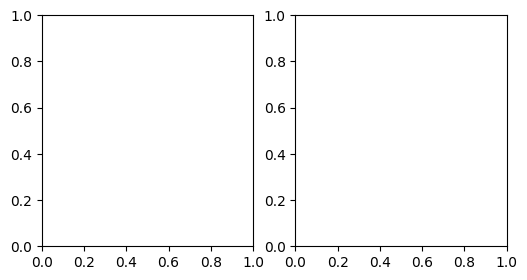

In [ ]:
fig, [ax_pw, ax_bi] = plt.subplots(1, 2, figsize = (6,3))

############# Powerlaw #################
for idx, (h, beta) in enumerate(zip(hmatrix_pw, betas)):
    if idx == 0: label = 'Theory'
    else: label = ''
    
    theory = get_policy(n_max = NUM_STATES, 
                        func = pdf_powerlaw,
                        beta = 1,)
    ax_pw.plot(np.arange(2, NUM_STATES+1), theory[1:], c = color(idx))
    ax_pw.plot(np.arange(2, NUM_STATES+2), h[0,:]/h.sum(0), 'o', 
               c = color(idx),  label = fr'$\beta$ = {beta}', alpha = 0.8, markeredgecolor='None', lw = 0.05)

# plt.setp(ax_pw, xlim = (1.8, 30), ylim = (0.0, 1.01),
#          xlabel =r'$l$', ylabel = r'$\pi_s(l)$', 
#          yticks = np.round(np.arange(0.2, 1.01, 0.2),1),
#          yticklabels = np.round(np.arange(0.2, 1.01, 0.2),1).astype(str),
#          xscale = 'log')

ax_pw.plot(10, 10, label = 'Theory', c = 'k')   
ax_pw.legend(fontsize = font_legend)
   
    

TypeError: get_policy() missing 1 required positional argument: 'func'

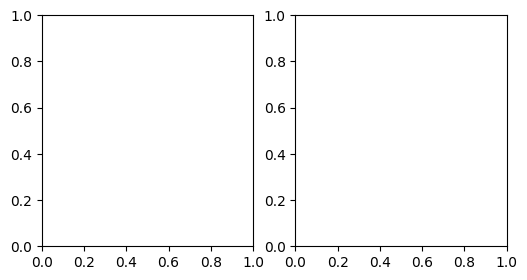

In [ ]:
############# BiExp #################
for idx, (lambda_1, h) in enumerate(zip(lambdas_1, hmatrix_bi)):    
    lambdas[0] = lambda_1    
    ps_composite = get_ps_composite(num_states, lambdas = lambdas, probs = probs)
    ax_bi.plot(np.arange(2, num_states+1), ps_composite[1:], '-', 
               c = color(idx))    
    ax_bi.plot(np.arange(2, num_states+2), h, 'o',               
               c = color(idx),  label = fr'$d_1$ = {np.round(lambda_1,1)}', alpha = 0.8, markeredgecolor='None')

ax_bi.plot(10, 10, label = 'Theory', c = 'k')   
ax_bi.legend(fontsize = font_legend)
    
    
plt.setp(ax_pw, xlabel =r'$n$', ylabel = r'$\pi(\uparrow|N)$', xscale = 'log')
plt.setp([ax_pw, ax_bi], xlim = (1.6, 30), ylim = (0.1, 1.049972989855765)) ;
plt.setp(ax_bi, ylabel = '', xlabel = r'$n$', yticklabels = [], xscale = 'log');

## Fig Cutoff

In [ ]:
probs = np.array([0.94, 0.06])
lambdas = np.array([0.6, 5000])
# Get theoretical policy
theory_cutoff = get_ps_composite(L = num_states, lambdas = lambdas, probs = probs)


# Setting a max step length
L_cutoffs = [30, 150, 500, 2000, 10000]

steps_og = discrete_composite_sample(lambdas = lambdas, probs = probs, L_max = num_states, num_samples = num_steps*epochs)


hmatrix_co = np.zeros((len(L_cutoffs), num_states))
for idx_c, L_cutoff in enumerate(tqdm(L_cutoffs)):
    # L_cutoff *= num_states

    steps = steps_og.copy()
    while np.max(steps) > L_cutoff:
            steps[steps > L_cutoff] = discrete_composite_sample(lambdas = lambdas, 
                                                                probs = probs,
                                                                L_max = num_states, num_samples = len(steps[steps > L_cutoff]))
    steps = steps.reshape(epochs, num_steps)
    ps = simul_2actions(num_states = num_states,
                    eta = int(1e-7),
                    gamma = 0)
    # Training
    for e in (range(epochs)):
        ps.reset()
        for s in steps[e]:         
            ps.reward(length = s)
    # Saving
    hmatrix_co[idx_c] = ps.h_matrix[0]/ps.h_matrix.sum(0)


  0%|          | 0/5 [00:00<?, ?it/s]

[Text(0.5, 0, '$n$'), Text(0, 0.5, '$\\pi(\\uparrow|N)$'), None]

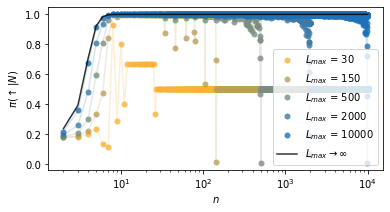

In [ ]:
fig, ax_co = plt.subplots(figsize = (6, 3))

############# Cutoff #################
for idx, (h, L_cutoff) in enumerate(zip(hmatrix_co, L_cutoffs)):   
    ax_co.plot(np.arange(2, num_states+2), h, 'o',               
               c = color(idx, num_c=5),  label = r'$L_{max}$ = '+f'{L_cutoff}', alpha = 0.8, markeredgecolor='None', rasterized=True)
    ax_co.plot(np.arange(2, num_states+2), h,                
               c = color(idx, num_c=5),  alpha = 0.2)

ax_co.plot(np.arange(2, num_states+1), theory_cutoff[1:], '-', c = 'k', alpha = 0.8, label = r'$L_{max}\rightarrow \infty$') 

plt.legend(fontsize = font_legend,  loc = 'lower right')

########### Shared ################
    
plt.setp(ax_co, xlabel =r'$n$', ylabel = r'$\pi(\uparrow|N)$', xscale = 'log')


# ax_pw.set_title('a) Power law', fontsize = font_legend)
# ax_bi.set_title('b) Bi-exponential', fontsize = font_legend)
# ax_co.set_title('Power law')

# for a, let in zip([ax_pw, ax_bi, ax_co], 'abc'):
#     a.annotate(let+')', xy = (0.02, 0.92),  fontsize = 12, xycoords = 'axes fraction') ;
    
#fig.savefig('../../../overleaf/optimal_rl/figures/fake_training_cutoff.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)